In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 16.8 MB/s eta 0:00:00


In [16]:
from ultralytics import YOLO

In [17]:
model = YOLO("yolov8m.pt")

In [4]:
results = model.predict("/content/drive/MyDrive/test_data/istockphoto-639136146-612x612.jpg")


image 1/1 /content/drive/MyDrive/test_data/istockphoto-639136146-612x612.jpg: 448x640 1 banana, 4 apples, 825.1ms
Speed: 10.9ms preprocess, 825.1ms inference, 23.2ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
result = results[0]

In [6]:
len(result.boxes)

5

In [7]:
box = result.boxes[0]

In [8]:
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([47.])
Coordinates: tensor([[324.7527, 221.8470, 494.1953, 375.5172]])
Probability: tensor([0.9163])


In [9]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 47.0
Coordinates: [324.752685546875, 221.84698486328125, 494.1952819824219, 375.5172424316406]
Probability: 0.9163215756416321


In [11]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: apple
Coordinates: [325, 222, 494, 376]
Probability: 0.92


In [12]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: apple
Coordinates: [325, 222, 494, 376]
Probability: 0.92
---
Object type: apple
Coordinates: [81, 169, 203, 280]
Probability: 0.9
---
Object type: apple
Coordinates: [454, 179, 604, 331]
Probability: 0.89
---
Object type: banana
Coordinates: [38, 29, 383, 372]
Probability: 0.75
---
Object type: apple
Coordinates: [356, 178, 449, 227]
Probability: 0.61
---



image 1/1 /content/drive/MyDrive/test_data/istockphoto-639136146-612x612.jpg: 448x640 1 banana, 4 apples, 739.2ms
Speed: 1.9ms preprocess, 739.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


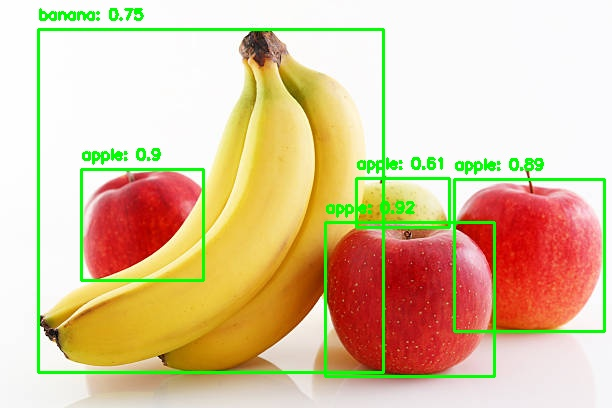

In [21]:
from ultralytics import YOLO
import cv2
from IPython.display import Image, display

# Load the YOLO model
model = YOLO("yolov8m.pt")

# Predict objects in the image
results = model.predict("/content/drive/MyDrive/test_data/istockphoto-639136146-612x612.jpg")
result = results[0]

# Load the original image
image = cv2.imread("/content/drive/MyDrive/test_data/istockphoto-639136146-612x612.jpg")

# Iterate through detected boxes
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    # Draw bounding box on the image
    x1, y1, x2, y2 = cords
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Add label with confidence
    label = f"{class_id}: {conf}"
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save the image with bounding boxes and labels
output_image_path = "/content/drive/MyDrive/test_data/output_image.jpg"
cv2.imwrite(output_image_path, image)

# Display the image using IPython.display
display(Image(filename=output_image_path))
